## AlexNet

In [109]:
# 导入相关的包
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import os

# 指定训练设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [110]:
# 对图片的预处理
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor()
])

# 导入数据集
train_data = torchvision.datasets.CIFAR10(root='../数据集/cifar10', train=True, transform=transform, download=True)
test_data = torchvision.datasets.CIFAR10(root='../数据集/cifar10', train=False, transform=transform, download=True)

Files already downloaded and verified
Files already downloaded and verified


(50000, 32, 32, 3)
(10000, 32, 32, 3)
该图片是:frog


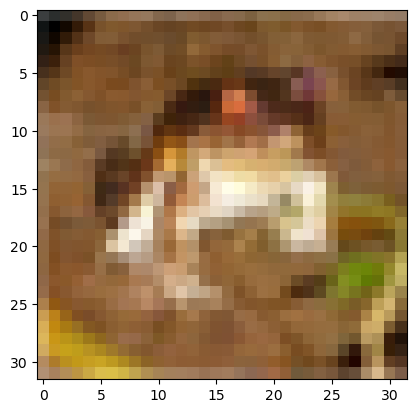

In [111]:
%matplotlib inline
# 查看数据集形状
print(train_data.data.shape)
print(test_data.data.shape)
# 用matplotlib查看训练集的第一张图片
import matplotlib.pyplot as plt
print(f"该图片是:{train_data.classes[train_data.targets[0]]}")
img = train_data.data[0]
plt.imshow(img)

torch.Size([3, 224, 224])
torch.Size([224, 224, 3])


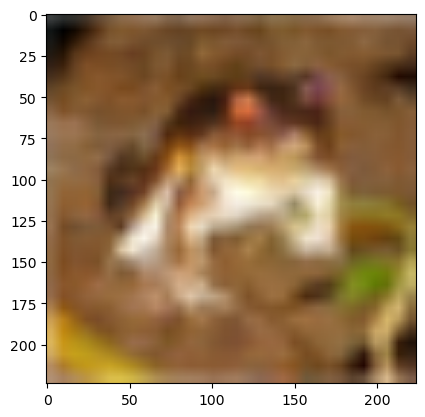

In [112]:
# 查看经过transform后的图片
# 1-获取图片
img_transform = train_data[0][0]
print(img_transform.shape)
# 2-重新排列维度
img_transform = img_transform.permute(1, 2, 0)
print(img_transform.shape)
plt.imshow(img_transform)

In [113]:
# 保存数据集的长度
train_data_size = len(train_data)
test_data_size = len(test_data)
print("训练数据集的长度为：{}".format(train_data_size))
print("测试数据集的长度为：{}".format(test_data_size))

训练数据集的长度为：50000
测试数据集的长度为：10000


In [114]:
# 创建数据加载器
train_dataloader = DataLoader(train_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

In [115]:
# 创建模型
class AlexNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3,stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Flatten(),
            nn.Linear(6400, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 10)
        )    
    def forward(self, x):
        return self.model(x)

In [116]:
# 实例化网络
alexnet = AlexNet()
alexnet.to(device)

# 初始化模型参数
def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d:
        torch.nn.init.xavier_uniform_(m.weight)
alexnet.apply(init_weights)

AlexNet(
  (model): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (13): Flatten(start_dim=1, end_dim=-1)
    (14): Linear(in_features=6400, out_features=4096, bias=True)
    (15): ReLU()
    (16): Dropout(p=0.5, inplace=False)
    (17): Linear(in_features=4096, out_features=4096, bias=True)
    (18): ReLU()
   

In [117]:
# 查看网络结构
x = torch.randn((1, 3, 224, 224), device=device)
for layer in alexnet.model:
    x = layer(x)
    print(layer.__class__.__name__,'Output shape:\t',x.shape)

Conv2d Output shape:	 torch.Size([1, 96, 54, 54])
ReLU Output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d Output shape:	 torch.Size([1, 96, 26, 26])
Conv2d Output shape:	 torch.Size([1, 256, 26, 26])
ReLU Output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d Output shape:	 torch.Size([1, 256, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 256, 12, 12])
ReLU Output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d Output shape:	 torch.Size([1, 256, 5, 5])
Flatten Output shape:	 torch.Size([1, 6400])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])


In [118]:
# 损失函数
loss_fn = nn.CrossEntropyLoss()
loss_fn = loss_fn.to(device)

# 优化器
learning_rate = 0.01
optimizer = torch.optim.SGD(alexnet.parameters(), lr=learning_rate)

# 设置训练网络的一些参数
# 记录训练的次数
total_train_step = 0
# 记录测试的次数
total_test_step = 0

# 设置训练网络的循环次数
epoch = 30

In [119]:
# 开始训练
for i in range(epoch):
    # 训练过程
    print("------第{}轮训练开始------".format(i+1))
    alexnet.train()
    for data in train_dataloader:
        imgs, targets = data
        imgs = imgs.to(device)
        targets = targets.to(device)
        output = alexnet(imgs)
        loss = loss_fn(output, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_train_step += 1
        if total_train_step % 100 == 0:
            print("训练次数：{}，loss：{}".format(total_train_step, loss.item()))
    
    # 测试过程
    alexnet.eval()
    with torch.no_grad():
        total_test_loss = 0
        total_accuracy = 0
        for data in test_dataloader:
            imgs, targets = data
            imgs = imgs.to(device)
            targets = targets.to(device)
            output = alexnet(imgs)
            loss = loss_fn(output, targets)
            total_test_loss += loss.item()
            accuracy = (output.argmax(1) == targets).sum()
            total_accuracy += accuracy.item()
            total_test_step += 1
            
    # 输出一个轮次的信息
    print(f"整体测试集上的loss:{total_test_loss}")
    print(f"整体测试集上的正确率:{total_accuracy/test_data_size}")
    total_test_step += 1
    
    # 创建文件夹用来保存模型
    dir_path = os.path.join(".", "模型保存", "2-AlexNet")
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
    # 保存每一轮的模型
    torch.save(alexnet.state_dict(), f"./模型保存/2-AlexNet/alexnet{i}.pth")
    print("模型保存成功")
    

------第1轮训练开始------
训练次数：100，loss：6.636358261108398
训练次数：200，loss：5.972931385040283
训练次数：300，loss：5.876722812652588
训练次数：400，loss：5.82977294921875
训练次数：500，loss：5.740971565246582
训练次数：600，loss：5.545557975769043
训练次数：700，loss：6.339553356170654
整体测试集上的loss:826.5773224830627
整体测试集上的正确率:0.2577
模型保存成功
------第2轮训练开始------
训练次数：800，loss：5.589934349060059
训练次数：900，loss：5.40423583984375
训练次数：1000，loss：5.327456474304199
训练次数：1100，loss：5.78662109375
训练次数：1200，loss：5.690769672393799
训练次数：1300，loss：4.772470951080322
训练次数：1400，loss：5.979184150695801
训练次数：1500，loss：4.904379844665527
整体测试集上的loss:836.8119144439697
整体测试集上的正确率:0.3799
模型保存成功
------第3轮训练开始------
训练次数：1600，loss：5.637828350067139
训练次数：1700，loss：5.654416084289551
训练次数：1800，loss：6.266242027282715
训练次数：1900，loss：5.546449661254883
训练次数：2000，loss：4.932268142700195
训练次数：2100，loss：4.89536190032959
训练次数：2200，loss：4.581029891967773
训练次数：2300，loss：4.778258800506592
整体测试集上的loss:843.3967490196228
整体测试集上的正确率:0.2703
模型保存成功
------第4轮训练开始------
训练次数：2400，lo

KeyboardInterrupt: 